<a href="https://colab.research.google.com/github/AzadMehedi/Statistics/blob/main/6_Statistical_Terms_should_know.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# `6 Statistical Terms` I wish I knew before starting my `first Data Science Job`

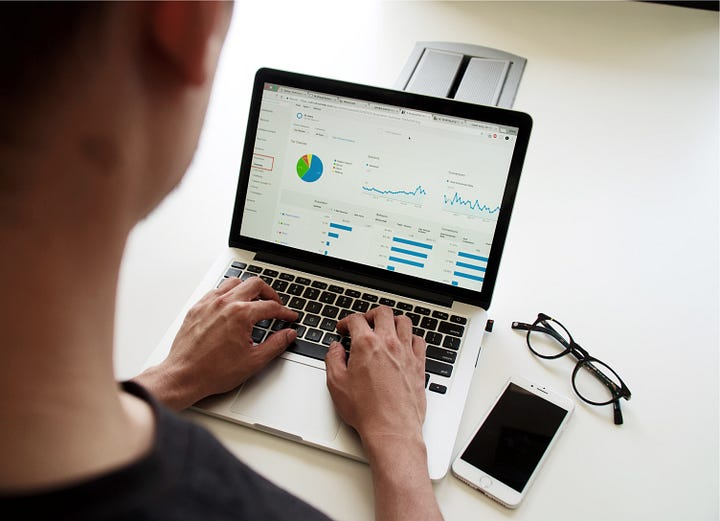

# 1. Bootstrapping

Bootstrapping is a statistical technique that involves resampling your data to generate multiple datasets for analysis. Instead of collecting new data, you use your existing data to create many new samples. This is done by randomly selecting data points from your original dataset with replacements, meaning that the same data point can be chosen more than once. For example, suppose you have a dataset of 100 observations and you want to estimate the mean of a variable. With bootstrapping, you would randomly select 100 observations from the dataset with replacement, compute the mean of those observations, and record it. You would then repeat this process many times, perhaps 1000 or more, to create a distribution of means. This distribution can then be used to estimate the standard error of the mean, construct confidence intervals, or perform hypothesis tests.

Bootstrapping is a useful technique when the assumptions of traditional statistical tests are not met or when your sample size is small. It can also be used to estimate the bias and variance of a model, compare different models, or validate the performance of a model. For example, suppose you want to compare the accuracy of two regression models for predicting house prices. With bootstrapping, you would randomly sample a subset of your data, fit each model to the subset, and record their performance. You would then repeat this process many times to generate distributions of the models’ performance. This can help you to understand the uncertainty in the models’ predictions and choose the better-performing model.

### Here’s an example of how to perform bootstrapping in Python (using pandas and numpy)

In [ ]:
# loading dependencies

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# load Dataset - here we are creating a sample dataset using dataframe

df = pd.DataFrame({'numbers' : [1,2,3,4,5,6,7,8]})

In [ ]:
# define a function to compute the mean of a dataset

def mean_func(data):
  return np.mean(data)

In [ ]:
# set the number of bootstrapping samples to 1000

n_bootstrap = 1000

In [ ]:
# generate bootstrap samples by randomly selecting rows from the original dataset with replacment using the sample function

bootstrap_samples = []
for i in range(n_bootstrap):
  sample = df.sample(frac=1, replace=True)
  bootstrap_samples.append(sample)

In [ ]:
# computer means for each bootstrap sample

bootstrap_means = []
for sample in bootstrap_samples:
  mean = mean_func(sample)
  bootstrap_means.append(mean)

In [ ]:
# compute the 95% confidence interval by calculating the 2.5th and 97.5th percentile

alpha = 0.5
lower = np.percentile(bootstrap_means, alpha/2 * 100)
upper = np.percentile(bootstrap_means, (1 - alpha/2) * 100)

print(f'The mean is: {np.mean(df)}')
print(f'The 95% confidence interval is: [{lower}, {upper}]')

The mean is: numbers    4.5
dtype: float64
The 95% confidence interval is: [4.0, 5.125]


# 2. Student’s T-test

A t-test is a statistical test that allows you to compare the means of two groups of data and determine if they are significantly different. It helps you to answer questions such as: `“Are the means of two groups of data different from each other?”` or `“Is the difference between two means statistically significant?”`

There are two types of t-tests: `the independent samples t-test` and the `paired samples t-test`. 
- The `independent samples t-test` is used when you have `two independent groups of data`, 
- while the `paired samples t-test` is used when you have `two related groups of data`, such as `pre-test` and `post-test measurements` on the same subjects.

In [3]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind

In [ ]:
# Load data into two separate dataframes
df1 = pd.read_csv('group1.csv')
df2 = pd.read_csv('group2.csv')

In [ ]:
# perform t-test 
# using the ttest_ind function from the scipy.stats library
# the function returns the t-statistic and p-value of the test

t_test, p_value = ttest_ind(df1['variable'], df2['variable'])

# print result

print(f't-statistic: {t_stat}')
print(f'p-value: {p_value}')

if p_value < 0.05:
  print('The means of two groups are significantly different.')
else:
  print('There are no significantly difference between the means of two groups')

The t-test is a useful statistical tool for comparing the means of two groups of data and determining if the difference between them is significant.

# 3. Effect Size

Effect size is the size of the difference between two groups or things. It measures the magnitude of the relationship or the degree of difference between the groups, independent of the sample size. Let’s say you have a big pile of cookies and your friend has a small pile of cookies. The effect size would be how many more cookies you have than your friend. If you have just a few more cookies than your friend, that’s a small effect size. But if you have a whole lot more cookies than your friend, that’s a big effect size. Effect size helps us understand how different things are from each other, so we can figure out if the difference is really important or not.

There are several ways to calculate the effect size, depending on the type of data and analysis used. Some common measures of effect size include Cohen’s d, Pearson’s r, and odds ratios.

In [8]:
import scipy.stats as stats
import numpy as np

In [10]:
# create two groups of data

group1 = np.random.normal(10, 2, size=100)   # loc(mean), scale(std), size(number of item)
group2 = np.random.normal(12, 2, size=100)

In [14]:
# Calculate Cohen's d(standardized mean difference)
# which is the difference between the means of the two groups divided by the pooled standard deviation.

diff = group1.mean() - group2.mean()
polled_std = np.sqrt((group1.std()**2 + group2.std()**2) / 2)
d = diff/polled_std

#print the result
print(f'Cohens d: {d}')

Cohens d: 0.17188865477991933


A Cohen’s d of 
- `0.2` is considered a `small effect size` - (small difference or relationship between the groups), 
- `0.5` is considered a `medium effect size` - (moderate difference or relationship between the groups or variables), and 
- `0.8 or higher` is considered a `large effect size` (strong difference or relationship between the groups or variables).

The effect size is an important statistical concept that helps researchers to understand the practical significance of their findings and to compare results across different studies.

# 4. Power Analysis

Power analysis is a statistical method used to determine the sample size (how many data points/participants) required to detect a statistically significant effect in a study. It helps researchers to determine the probability of correctly rejecting the null hypothesis (i.e., finding a significant effect) if a true effect exists. At my job, we use it to estimate the number of participants for user research. In other words, power analysis allows researchers to estimate the statistical power of their study, which is the probability of detecting a true effect if it exists. A high statistical power means that the study is more likely to find a significant effect if there is one, while a low power means that the study is less likely to detect a significant effect even if there is one.